In [1]:
import scipy.io
import pandas as pd
import numpy as np
import os


path = '/content/drive/MyDrive/Colab Notebooks/data'
subjects = ["S1", "S2", "S3", "S4", "S5"]
unicorn_channels = ["Fz", "C3", "Cz", "C4", "Pz", "PO7", "Oz", "PO8"]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Data conversion
Converting all .mat files to Pandas DataFrames in .json

In [3]:
for subj in subjects:
  file_path = os.path.join(path, subj)
  data = scipy.io.loadmat(file_path  + ".mat")

  df = pd.DataFrame(data=data["y"], columns=unicorn_channels)
  df["trigger"] = data["trig"]
  df["sampling_rate"] = data["fs"][0][0]
  new_path = os.path.join(path, "json", subj)
  df.to_json(new_path + ".json")

Load one dataset to check the format

In [4]:
df = pd.read_json("/content/drive/MyDrive/Colab Notebooks/data/json/S2.json")
trigger = np.array(df.trigger)
print(np.nonzero(trigger), len(np.nonzero(trigger)[0]))

(array([ 1250,  1294,  1339, ..., 59385, 59430, 59473]),) 1200


Visualize trigger data

150 1050


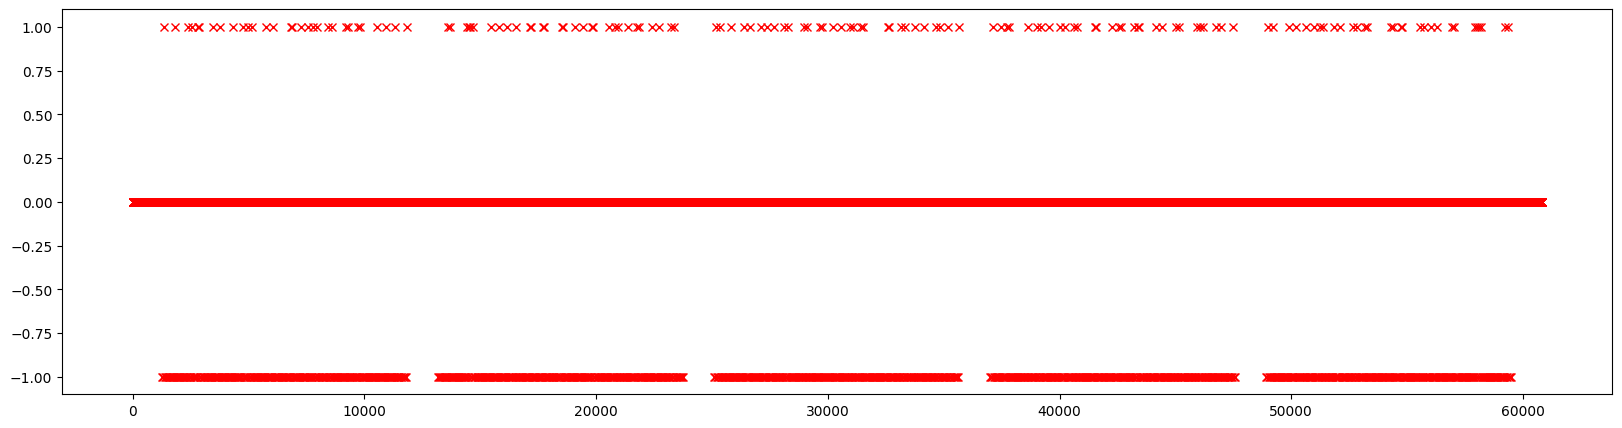

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)


target = np.where(trigger == 1)[0] 
not_target = np.where(trigger == -1)[0]
print(len(target), len(not_target))
plt.plot(trigger, 'x')

In [5]:
# Setup empty dictionary with all the channels
all_data = {
    "subject": [],
    "Fz": [],
    "C3": [],
    "Cz": [],
    "C4": [],
    "Pz": [],
    "PO7": [],
    "Oz": [],
    "PO8": [],
    "trigger": [],
    "sampling_rate": []
}
for subj in subjects:
  file_path = os.path.join(path, subj)
  data = scipy.io.loadmat(file_path  + ".mat")
  eeg_data = data["y"]

  # Transpose the data for each channel into a single array
  for i in range(len(unicorn_channels)):
    all_data[unicorn_channels[i]].append(eeg_data[:, i])


  # Flatten trigger data to obtain a clean array
  trigger = data["trig"].flatten()
  
  # Check index of trigger events and amount of datapoints
  print(np.nonzero(trigger), len(np.nonzero(trigger)[0]))

  # Append remaining metadata
  all_data["subject"].append(subj)
  all_data["trigger"].append(trigger)
  all_data["sampling_rate"].append(int(data["fs"][0][0]))

# Convert dict to df then save
df = pd.DataFrame(all_data)
new_path = os.path.join(path, "json", "p300")

# Load df from json to test
df.to_json(new_path + ".json")
df = pd.read_json(new_path + ".json")
df

(array([ 1254,  1299,  1342, ..., 59446, 59489, 59534]),) 1200
(array([ 1250,  1294,  1339, ..., 59385, 59430, 59473]),) 1200
(array([ 1267,  1310,  1354, ..., 59471, 59516, 59559]),) 1200
(array([ 1246,  1289,  1336, ..., 59365, 59411, 59454]),) 1200
(array([ 1247,  1294,  1338, ..., 59431, 59482, 59522]),) 1200


,subject,Fz,C3,Cz,C4,Pz,PO7,Oz,PO8,trigger,sampling_rate
0,S1,"[11.5640217926, 11.4963535819, 11.0217163903, ...","[6.806194855, 4.750291082, 1.9889785121, -1.04...","[-0.8399581376, 0.2637836756, 1.27320768630000...","[9.3358710164, 9.4843039219, 9.215325406, 8.84...","[5.7969899032, 5.2522659298, 4.4379139303, 3.3...","[36.2729629052, 33.8846638145, 30.8106954238, ...","[5.2655415915, 4.1472894836, 3.4267292625, 2.9...","[4.0323940762, 3.8184558056, 3.9173950154, 4.1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",250
1,S2,"[6.4284201064, 9.3380593285, 10.4143810969, 9....","[7.5946519545, 10.3531453861, 11.0116780273, 9...","[28.0562746762, 30.9854790907, 30.7681237427, ...","[2.6566530977, 5.6321866564, 6.3509146391, 4.7...","[5.8037565949, 9.1278312942, 10.0641310837, 8....","[9.1801173556, 13.9177565768, 15.6531860265, 1...","[13.724885452, 16.9051579775, 17.3321539434, 1...","[2.5529541302, 4.2372703233, 4.3003931784, 2.7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",250
2,S3,"[4.9711648097, 5.4384076682, 4.4970138701, 1.8...","[2.9548568836999998, 3.2990781311, 2.658318273...","[5.4345775454, 5.0463495393, 3.432136423, 0.48...","[4.0314144069, 3.5182383395, 2.080017848, -0.3...","[4.5064132525, 4.2589575721, 3.2778247554, 1.4...","[3.365448141, 4.016731684, 4.1037216846, 3.230...","[5.2252603398, 5.5719143879, 5.7136623234, 5.3...","[2.2122889965, 2.1807872907, 2.0233420988, 1.4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",250
3,S4,"[18.6944843289, 20.5977761466, 22.7282805317, ...","[7.7116748323, 9.8237052077, 12.8265557138, 15...","[13.1110417322, 15.6165747298, 18.8989651376, ...","[5.8620417621000005, 6.9211073292, 8.537069016...","[4.3890552063, 4.7188760494, 5.844245683200000...","[2.9891506155, 1.7220225282000001, 1.067834838...","[9.0425034227, 7.6821290515000005, 6.809280263...","[2.6238998655, 1.5356224385, 0.838335260700000...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",250
4,S5,"[-7.3061362541, -8.485439128, -9.7031921009, -...","[1.3315681951, 1.7363534766000002, 1.606679163...","[-10.8386150482, -7.9518154252, -4.4011370093,...","[6.5214774083, 6.5375610605, 5.9879352713, 4.9...","[-8.8729718607, -7.0544968623, -5.1720683952, ...","[-4.2740603926, -1.6753330230999999, 3.0878722...","[1.3001710663, 2.4680461173, 3.561906533, 4.32...","[6.1183261349, 7.0731966708, 7.7603332073, 7.9...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",250
